# Deep Learning for Healthcare

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Workshops/blob/main/Deep_Learning_for_Healthcare/Deep_Learning_for_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In the world of healthcare, one of the major issues that medical professionals face is the correct diagnosis of conditions and diseases of patients. Not being able to correctly diagnose a condition is a problem for both the patient and the doctor. The doctor is not benefitting the patient in the appropriate way if the doctor misdiagnoses the patient. This could lead to malpractice lawsuits and overall hurt the doctor’s business. The patient suffers by not receiving the proper treatment and risking greater harm to health by the condition that goes undetected; further, the patient undergoes unnecessary treatment and takes unnecessary medications, costing the patient time and money.

There are several drivers that push forward the use of deep learning in radiology and other diagnostic practices:

* The continued growth of computing power and storage technologies.
* Declining cost of hardware.
* Rising cost of healthcare.
* The shortage of healthcare workers, and
an abundance of medical data to train models. In the US alone, 60 billion radiology images are generated annually — not to mention other data.


We will apply a convolutional neural network (CNN) and try to classify a patient as either having pneumonia or not having pneumonia. This is a binary classification problem.

# Dataset 

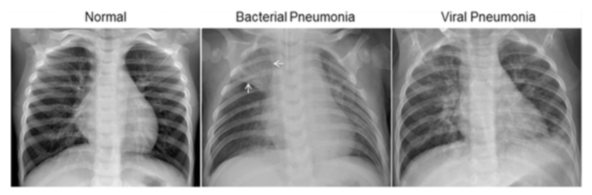

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

## Download The Dataset

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! ls /root/.kaggle

kaggle.json


In [4]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:57<00:00, 45.3MB/s]
100% 2.29G/2.29G [00:57<00:00, 42.5MB/s]


In [6]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# Import the Necessary Libraries

In [7]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt
import glob 
import numpy as np
import os 


# Read the Data

In [8]:
# create function to create dataframe that have two columns: paths and labels for the images
def data_creater(file_path):
    # get the list of folders in the directory
    classes= os.listdir(file_path)
    # create empty lists for the images and labels
    images_path = []
    label_list = []
    # loop through the folders
    for index , class_type in enumerate(classes):
        # get the path of the images
        images = glob.glob(file_path+'/'+class_type+'/*.jpeg')
        # add the images to the list
        images_path.extend(images)
        # add the labels to the list
        label_list.extend([index]*len(images))
    # create a dataframe with the images and labels
    data = pd.DataFrame({'path':images_path,'label':label_list})
    # return the dataframe
    return data
# create a dataframe for the train images
train_df=data_creater('/content/chest_xray/train')
# create a dataframe for the test images
test_df = data_creater('/content/chest_xray/test')

In [9]:
# show the train dataframe
train_df

,path,label
0,/content/chest_xray/train/PNEUMONIA/person445_...,0
1,/content/chest_xray/train/PNEUMONIA/person612_...,0
2,/content/chest_xray/train/PNEUMONIA/person663_...,0
3,/content/chest_xray/train/PNEUMONIA/person388_...,0
4,/content/chest_xray/train/PNEUMONIA/person1309...,0
...,...,...
5211,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,1
5212,/content/chest_xray/train/NORMAL/NORMAL2-IM-08...,1
5213,/content/chest_xray/train/NORMAL/NORMAL2-IM-09...,1
5214,/content/chest_xray/train/NORMAL/NORMAL2-IM-11...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13198e84d0>]],
      dtype=object)

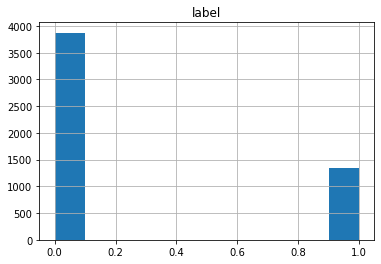

In [10]:
# plot the histogram of the train labels 
train_df.hist()

We can notic that the train dataset labels are not balanced. 

In [ ]:
# balance the data for the train dataframe
# get the images that has label 0
a=train_df[train_df.label==0]
# get the images that has label 1 and get the firt 1341 images 
b=train_df[train_df.label==1][:1341]
# concatenate the two dataframes to one dataframe
train_df=pd.concat([a,b])
train_df

In [ ]:
# plot the histogram of the train labels after balancing
train_df.hist()

We can notic that the train dataset labels are now balanced.

### Building an image data pipeline

The Dataset API allows you to build an asynchronous, highly optimized data pipeline to prevent your GPU from data starvation. It loads data from the disk (images or text), applies optimized transformations, creates batches and sends it to the GPU. Former data pipelines made the GPU wait for the CPU to load the data, leading to performance issues.

Before explaining how tf.data works with a simple example.
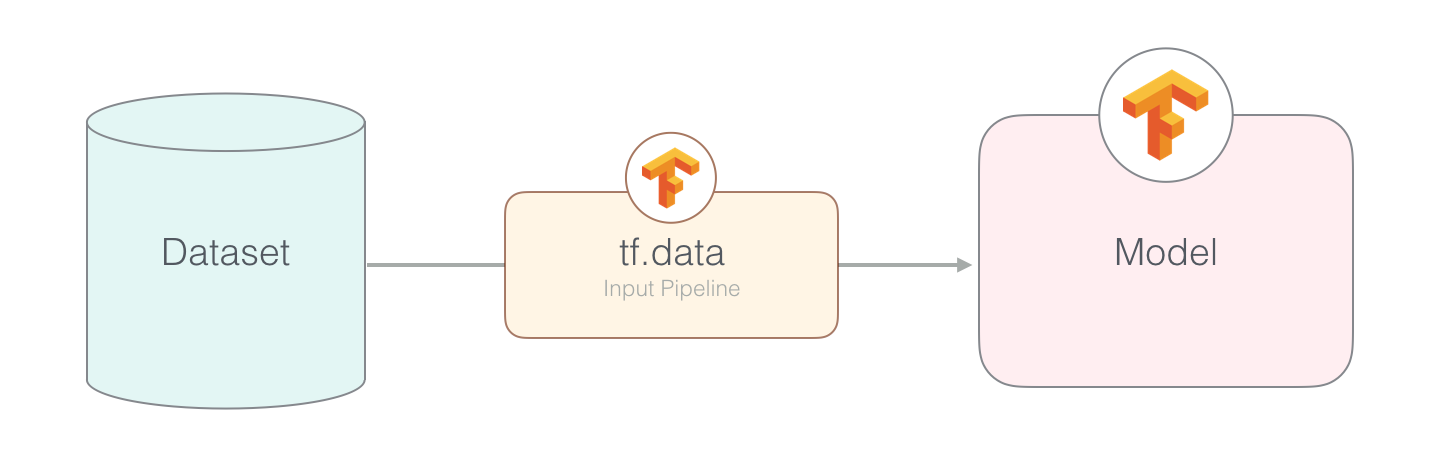


To create an input pipeline, you must start with a data source. For example, to construct a Dataset from data in memory, you can use tf.data.Dataset.from_tensors() or tf.data.Dataset.from_tensor_slices(). Alternatively.

Once you have a Dataset object, you can transform it into a new Dataset by chaining method calls on the tf.data.Dataset object. For example, you can apply per-element transformations such as Dataset.map(), and multi-element transformations such as Dataset.batch().

The Dataset object is a Python iterable. This makes it possible to consume its elements using a for loop:



Now we're going to define the functions that will be used to create the pipeline, we'll first start with a function that takes an image path and label pair and returns the image tensor and the same label # Create the Data Pipeline 

In [13]:
# create a function to read the images
def read_images(x,y):
    # read the image
    x=tf.io.read_file(x)
    # decode the image to a tensor
    x = tf.image.decode_jpeg(x,channels=3)
    # convert the image to a float32 tensor that has values between 0 and 1
    x = tf.image.convert_image_dtype(x,tf.float32)
    # resize the image to 299x299
    x =tf.image.resize(x,(299,299))
    # return the image and the label
    return x,y


# create the data pipeline function
def data_pipline(x,y):
    # create a dataset with the images and labels
    data =tf.data.Dataset.from_tensor_slices((x,y))
    # shuffle the data
    data =data.shuffle(1024)
    # create a map function to read the images
    data =data.map(read_images,num_parallel_calls=tf.data.AUTOTUNE)
    # create a batch of the data
    data= data.batch(32)
    # make sure the cpu and gpu are run in parallel
    data=data.prefetch(tf.data.AUTOTUNE)
    # return the data
    return data
# create the train data pipeline
train_dataset= data_pipline(train_df.path,train_df.label)
# create the test data pipeline
test_dataset = data_pipline(test_df.path,test_df.label)

(32, 299, 299, 3)
(32,)
tf.Tensor(0, shape=(), dtype=int64)


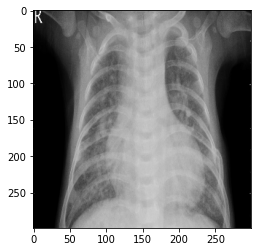

In [14]:
# get the first batch of the train data
for x ,y  in train_dataset.take(1):
    print(x.shape)
    print(y.shape)
    # print the first label in the batch
    print(y[0])
    # plot the first image in the batch
    plt.imshow(x[0])

# Convolution Neural Network (CNN)
There is, however, some preparation of the images that is necessary before applying an artificial neural network. The images need to be prepared using convolutional layers in a process called convolution. There are several stages in this process — convolution operation, ReLU operation, pooling, and flattening; the end result is a vector that we can feed into an artificial neural network.

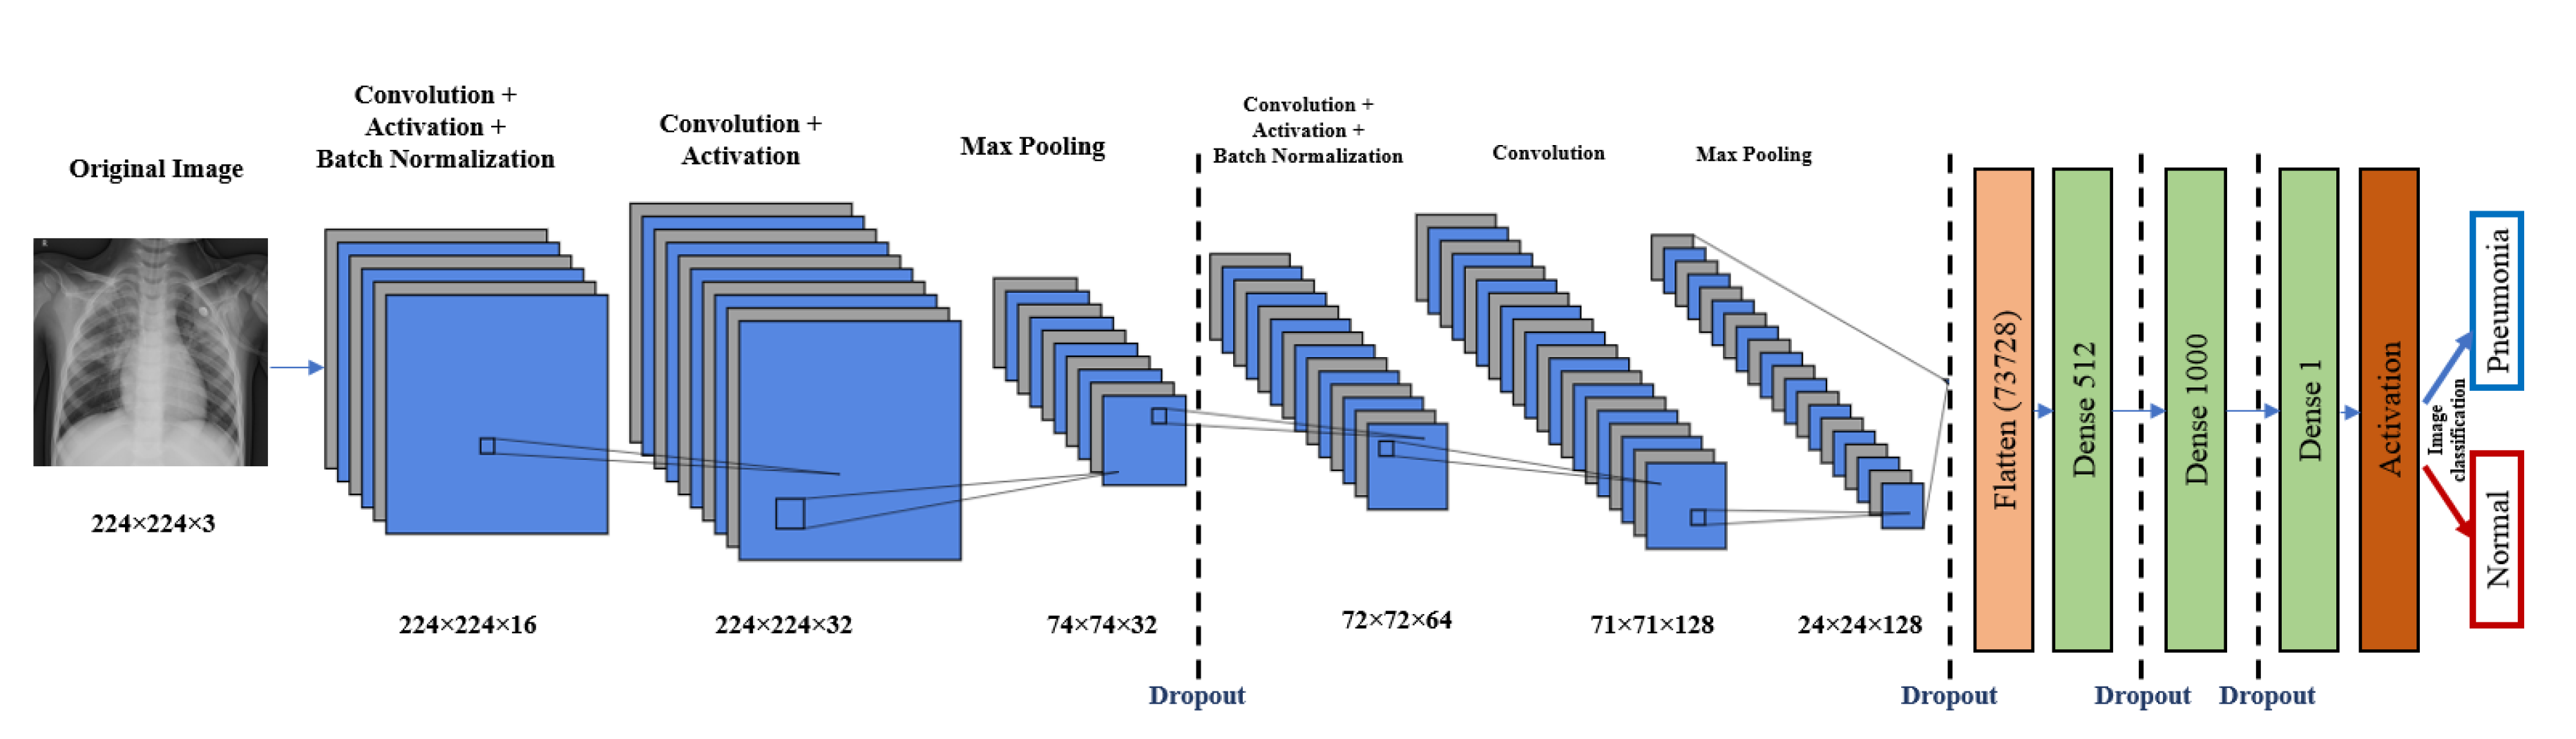

# Create the Model

In [15]:
# create the model using Sequential
model = tf.keras.Sequential([
                            # add the first layer       
                             tf.keras.layers.Input((299,299,3)),
                            # add the first convolutional layer with 16 filters and a kernel size of 3
                             tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the second convolutional layer with 32 filters and a kernel size of 3
                              tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the MaxPooling as the third layer to reduce the size of the images
                             tf.keras.layers.MaxPool2D(),
                            # add the third convolutional layer with 64 filters and a kernel size of 3
                             tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the MaxPooling as the fifth layer to reduce the size of the images
                             tf.keras.layers.MaxPool2D(),
                            # add the fourth convolutional layer with 128 filters and a kernel size of 3
                              tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the MaxPooling as the sixth layer to reduce the size of the images
                             tf.keras.layers.MaxPool2D(),
                            # add the fifth convolutional layer with 256 filters and a kernel size of 3
                             tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the MaxPooling as the seventh layer to reduce the size of the images
                             tf.keras.layers.MaxPool2D(),
                            # add the sixth convolutional layer with 512 filters and a kernel size of 3
                             tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),
                                                    padding='same',activation='relu'),
                            # add the MaxPooling as the eighth layer to reduce the size of the images
                             tf.keras.layers.MaxPool2D(),
                            # flatten the data to a 1D vector
                             tf.keras.layers.Flatten(),
                            # add the classifier layer with 1  unit and sigmoide activation because the data is binary
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)


                             

])

In [16]:
# show the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 299, 299, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       7

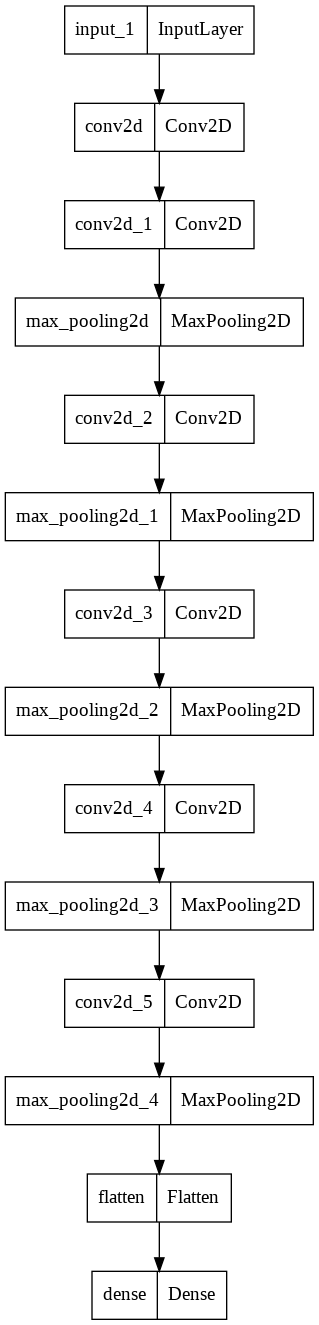

In [17]:
# plot the model
tf.keras.utils.plot_model(model)

In [18]:
# compile the model with the adam optimizer and binary cross entropy loss and accuracy as metrics
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['acc'])
# train the model on the train data for 3 epochs and validate on the test data
model.fit(train_dataset,epochs=3,validation_data=test_dataset)

Epoch 1/3
163/163 [==============================] - 79s 401ms/step - loss: 2.9848 - acc: 0.8434 - val_loss: 0.9562 - val_acc: 0.3750
Epoch 2/3
163/163 [==============================] - 67s 410ms/step - loss: 0.4727 - acc: 0.7974 - val_loss: 0.9196 - val_acc: 0.3750
Epoch 3/3
163/163 [==============================] - 66s 403ms/step - loss: 0.4017 - acc: 0.8192 - val_loss: 0.8563 - val_acc: 0.3750


# Transform Learning
Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.


# Create Model with Trained Model

The usual workflow for transfer learning is the following: 

1. Freeze all layers in the base model by setting trainable = False.
2. Create a new model on top of the output of one (or several) layers from the base model.
3. Train your new model on your new dataset.


Note that an alternative, more lightweight workflow could also be:

1. Instantiate a base model and load pre-trained weights into it.
2. Run your new dataset through it and record the output of one (or several) layers from the base model. This is called feature extraction.
3. Use that output as input data for a new, smaller model.

An issue with that workflow, though, is that it doesn't allow you to dynamically modify the input data of your new model during training, which is required when doing data augmentation, for instance. Transfer learning is typically used for tasks when your new dataset has too little data to train a full-scale model from scratch, and in such scenarios data augmentation is very important. So in what follows, we will focus on the first workflow.

In TensorFlow, we'll start by loading the pretrained model from `tf.keras.applications` API, a full list of available pretrained models can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [19]:
# load the Xception model as pre trained model 
cnn_model = tf.keras.applications.Xception(include_top=False)
# freeze the pre trained model
cnn_model.trainable=False

83697664/83683744 [==============================] - 1s 0us/step


In [20]:
# show the summary of the pre trained model
cnn_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

In [21]:
# create the new model with the pre trained model
model = tf.keras.Sequential([
                             tf.keras.layers.Input((299,299,3)),# add the first layer as the input layer with the size of 299x299x3
                             cnn_model,# add the pre trained model
                             tf.keras.layers.Flatten(),# flatten the output of the pre trained model
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)# add the classifier layer with 1  unit and sigmoide activation because the data is binary

])

In [22]:
# show the summary of the new model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 204801    
                                                                 
Total params: 21,066,281
Trainable params: 204,801
Non-trainable params: 20,861,480
_________________________________________________________________


In [23]:
# compile the model with the adam optimizer and binary cross entropy loss and accuracy as metrics
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['acc'])
# train the model on the train data for 1 epochs and validate on the test data
model.fit(train_dataset,epochs=1,validation_data=test_dataset)

163/163 [==============================] - 72s 416ms/step - loss: 1.4518 - acc: 0.9525 - val_loss: 2.9282 - val_acc: 0.8622


# Let's Test the Model with Images from the Test Set

In [ ]:
# load image from the path of the test folder using the read_images function
img,_= read_images('/content/chest_xray/test/PNEUMONIA/person161_bacteria_759.jpeg',1)

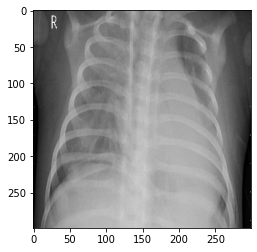

In [ ]:
# plot the image 
plt.imshow(img)

In [ ]:
# predict the image using the model
pred= model.predict(tf.expand_dims(img,0))
# print the prediction
print(pred)
# print prediction as boolean value if it is greater than 0.5 it is a pneumonia else it is not a pneumonia
print(pred>0.5)

[[1.]]
[[ True]]
